<a href="https://colab.research.google.com/github/aspiringmind/Data-Science-and-ML-projects/blob/master/Copy_of_Kmeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering
Segregating the potential customers based on RFM Score

RFM : recency,frequency, monetary

Then Clusters are created to differentiate platinum, gold and silver categories

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files

In [ ]:
up = files.upload()

Saving Online Retail.xlsx to Online Retail.xlsx


In [ ]:
import io
xlx = pd.read_excel(io.BytesIO(up["Online Retail.xlsx"]))

In [ ]:
df = pd.DataFrame(xlx)

In [ ]:
df.head(3)

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'lower', 'Description', 'Quantity',
       'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
df = df.drop("lower",axis=1)

In [ ]:
df.select_dtypes(['object']).columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Country'], dtype='object')

# Overall check

**Tracing duplicates**

In [ ]:
duplicateDFRow = df[df.duplicated(["CustomerID"])]

In [ ]:
duplicateDFRow.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom


In [ ]:
duplicateDFRow.shape

(537536, 8)

In [ ]:
df.shape

(541909, 8)

In [ ]:
df["CustomerID"].nunique()

4372

#Tracing the different number of products  purchased  by each user
( ["StockCode"].nunique() ) 

In [ ]:
order_frequency = df.groupby("CustomerID")["StockCode"].nunique().reset_index().sort_values(by="StockCode",ascending=False)

In [ ]:
order_frequency = order_frequency.rename(columns = {"CustomerID":"ID","StockCode":"Orders"})

In [ ]:
order_frequency

,ID,Orders
1895,14911.0,1794
330,12748.0,1769
4042,17841.0,1331
1300,14096.0,1121
1447,14298.0,884
...,...,...
3650,17307.0,1
2007,15070.0,1
3665,17331.0,1
3677,17347.0,1


In [ ]:
ty = df[df["CustomerID"]==14911.0]["StockCode"].nunique()
ty

1794

# Getting unique customer id with corresponding country

**Countrywise total count/ active orders**

**Unique IDs**

In [ ]:
#Customer distribution by country
country_cust_data=df[['Country','CustomerID']].drop_duplicates()
country_cust_data.groupby('Country')['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)
country_cust_data

,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0
...,...,...
536969,United Kingdom,13436.0
537255,United Kingdom,15520.0
538064,United Kingdom,13298.0
538812,United Kingdom,14569.0


In [ ]:
person_count=country_cust_data.groupby("Country")["CustomerID"].aggregate('count').reset_index() 


In [ ]:
person_count=person_count.sort_values(by="CustomerID",ascending=False)


**TOP COUNTRIES**

In [ ]:
person_count.head(10)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


**Inference: Majority of the customers is from United Kingdom**

# Checking for null values

In [ ]:
#Check for missing values in the dataset
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# TOP PURCHASE - COUNTRY AND ITS DATA

In [ ]:
#Keep only United Kingdom data
#Check for missing values in the dataset
#Can ignore missing values in description column
#Validate if there are any negative values in Quantity column
#Validate if there are any negative values in UnitPrice column
#Filter out records with negative values
#Add new column depicting total amount
uk = df[df["Country"]=="United Kingdom"]

In [ ]:
uk.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
uk.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [ ]:
len(uk)

495478

In [ ]:
133600/495478

0.2696386116033406

26% of data in customer id of UK is missing

lets concenterate on clusters now later will try to work with missing vaues

In [ ]:
#Remove missing values from CustomerID column, can ignore missing values in description column
uk= uk.dropna(axis=0,how="any",subset = ["CustomerID"])

In [ ]:
uk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [ ]:
#method 2 to remove null values in specified column using pandas builtin function
data = uk[pd.notnull(uk['CustomerID'])]

In [ ]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [ ]:
uk= uk[uk["Quantity"]>0]
uk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [ ]:
uk= uk[uk["UnitPrice"]>=0]
uk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [ ]:
uk["Total_Amount"]= uk.Quantity*uk.UnitPrice

In [ ]:
uk.head(6)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30


**Total Purchase amount**

In [ ]:
cust_tot_purchase = uk.groupby("CustomerID")["Total_Amount"].aggregate(sum).reset_index().sort_values(by="Total_Amount",ascending=False)

In [ ]:
cust_tot_purchase

,CustomerID,Total_Amount
3784,18102.0,259657.30
3315,17450.0,194550.79
2599,16446.0,168472.50
3357,17511.0,91062.38
2295,16029.0,81024.84
...,...,...
3681,17956.0,12.75
2605,16454.0,6.90
1399,14792.0,6.20
2808,16738.0,3.75


**Tracing the top customers**

In [ ]:
cust_tot_purchase.head(10)

,CustomerID,Total_Amount
3784,18102.0,259657.30
3315,17450.0,194550.79
2599,16446.0,168472.50
3357,17511.0,91062.38
2295,16029.0,81024.84
0,12346.0,77183.60
2767,16684.0,66653.56
903,14096.0,65164.79
621,13694.0,65039.62
1772,15311.0,60767.90


In [ ]:
uk[uk["CustomerID"]==18102.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount
16425,537657,82484,WOOD BLACK BOARD ANT WHITE FINISH,408,2010-12-07 16:42:00,4.78,18102.0,United Kingdom,1950.24
16426,537657,22830,UTILTY CABINET WITH HOOKS,30,2010-12-07 16:42:00,19.84,18102.0,United Kingdom,595.20
16427,537657,22189,CREAM HEART CARD HOLDER,972,2010-12-07 16:42:00,2.31,18102.0,United Kingdom,2245.32
16428,537657,22188,BLACK HEART CARD HOLDER,972,2010-12-07 16:42:00,2.31,18102.0,United Kingdom,2245.32
16429,537657,21623,VINTAGE UNION JACK MEMOBOARD,408,2010-12-07 16:42:00,6.38,18102.0,United Kingdom,2603.04
...,...,...,...,...,...,...,...,...,...
540066,581457,23535,WALL ART BICYCLE SAFETY,126,2011-12-08 18:43:00,3.90,18102.0,United Kingdom,491.40
540067,581457,23530,WALL ART ONLY ONE PERSON,126,2011-12-08 18:43:00,3.57,18102.0,United Kingdom,449.82
540068,581457,23526,WALL ART DOG LICENCE,126,2011-12-08 18:43:00,3.90,18102.0,United Kingdom,491.40
540069,581457,23401,RUSTIC MIRROR WITH LACE HEART,126,2011-12-08 18:43:00,4.15,18102.0,United Kingdom,522.90


In [ ]:
uk[uk["CustomerID"]==18102.0]["StockCode"].nunique()

150

**Inference** 

1. Id: 18102 made the maximum purchases of 259657.30

2. It shows 150 items are purchased by him/her but it doesnt mean it is the maximum order in the dataframe.

# RFM Modelling

In [ ]:
#Recency = Latest Date - Last Inovice Data
#Frequency = count of invoice no. of transactionS
#Monetary = Sum of Total Amount for each customer

In [ ]:
uk.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.4
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.6
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.0
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.8
541893,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,7.08,13113.0,United Kingdom,70.8


Last date is recorded as " 2011-12-09 "

In [ ]:
uk.select_dtypes(['object']).columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Country'], dtype='object')

In [ ]:
uk["InvoiceDate"].dtype

dtype('<M8[ns]')

In [ ]:
#example:
import datetime as dt
# This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)
last_date = dt.datetime(2011,12,1)
diff= Latest_Date - last_date
diff

datetime.timedelta(9)

In [ ]:
diff.days

9

In [ ]:
#Create RFM Modelling scores for each customer
#Recency = Latest Date - Last Inovice Data
#frequecy of purchase = len(invoiceno)
#money value sum(total_amount)

In [ ]:

R = uk.groupby('CustomerID')['InvoiceDate'].agg(lambda x: (Latest_Date - x.max()).days) 
# x is the output that gives the result for [Latest_Date - x.max()-->InvoiceDate.max()]

In [ ]:
R =R.astype(int)
R

CustomerID
12346.0    325
12747.0      2
12748.0      0
12749.0      3
12820.0      3
          ... 
18280.0    277
18281.0    180
18282.0      7
18283.0      3
18287.0     42
Name: InvoiceDate, Length: 3921, dtype: int64

In [ ]:
F = uk.groupby('CustomerID')['InvoiceNo'].apply(lambda x: x.count())
F #with duplicate invoicenos

CustomerID
12346.0       1
12747.0     103
12748.0    4596
12749.0     199
12820.0      59
           ... 
18280.0      10
18281.0       7
18282.0      12
18283.0     756
18287.0      70
Name: InvoiceNo, Length: 3921, dtype: int64

In [ ]:
Fr = uk.groupby('CustomerID')['InvoiceNo'].apply(lambda x: x.nunique())
Fr   #without duplicates

CustomerID
12346.0      1
12747.0     11
12748.0    210
12749.0      5
12820.0      4
          ... 
18280.0      1
18281.0      1
18282.0      2
18283.0     16
18287.0      3
Name: InvoiceNo, Length: 3921, dtype: int64

In [ ]:
M = uk.groupby('CustomerID')['Total_Amount'].agg(lambda x: x.sum())
M

CustomerID
12346.0    77183.60
12747.0     4196.01
12748.0    33719.73
12749.0     4090.88
12820.0      942.34
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2094.88
18287.0     1837.28
Name: Total_Amount, Length: 3921, dtype: float64

In [ ]:
RFM = pd.concat([R,Fr,M],axis=1)

In [ ]:
RFM = RFM.reset_index().sort_values(by="InvoiceNo",ascending=False) #sort by frequency

In [ ]:
RFM

,CustomerID,InvoiceDate,InvoiceNo,Total_Amount
2,12748.0,0,210,33719.73
3594,17841.0,1,124,40991.57
191,13089.0,2,97,58825.83
1268,14606.0,1,93,12156.65
1772,15311.0,0,91,60767.90
...,...,...,...,...
2582,16423.0,24,1,346.12
954,14165.0,275,1,122.54
956,14171.0,98,1,363.79
2577,16415.0,44,1,210.35


In [ ]:
RFM.rename(columns= dict({'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Total_Amount': 'Monetary'}), inplace=True,)

In [ ]:
RFM

,CustomerID,Recency,Frequency,Monetary
2,12748.0,0,210,33719.73
3594,17841.0,1,124,40991.57
191,13089.0,2,97,58825.83
1268,14606.0,1,93,12156.65
1772,15311.0,0,91,60767.90
...,...,...,...,...
2582,16423.0,24,1,346.12
954,14165.0,275,1,122.54
956,14171.0,98,1,363.79
2577,16415.0,44,1,210.35


# K means CLUSTERING

In [ ]:
#CREATING QUANTILES
#Split into four segments using quantiles
quantiles = RFM[["Recency",	"Frequency","Monetary"]].quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 300.03999999999996, 0.5: 651.8199999999999, 0.75: 1575.89},
 'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0}}

In [ ]:
RFM.Frequency.describe()

count    3921.000000
mean        4.246111
std         7.205750
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       210.000000
Name: Frequency, dtype: float64

In [ ]:
RFM.Recency.describe()

count    3921.000000
mean       91.722265
std        99.528532
min         0.000000
25%        17.000000
50%        50.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

In [ ]:
RFM.Monetary.describe()

count      3921.000000
mean       1863.910113
std        7481.922217
min           0.000000
25%         300.040000
50%         651.820000
75%        1575.890000
max      259657.300000
Name: Monetary, dtype: float64

Recency

score      days

1: 0-30 days

2: 31-60 days

3: 61-90 days

4: 91-180 days

5: 181-365 days

In [ ]:

quantiles = RFM[["Recency",	"Frequency","Monetary"]].quantile(q=[0.20,.40,.60,.80])
quantiles = quantiles.to_dict()
quantiles  #NESTED DICT

{'Frequency': {0.2: 1.0, 0.4: 2.0, 0.6: 3.0, 0.8: 6.0},
 'Monetary': {0.2: 241.61999999999998,
  0.4: 465.5499999999999,
  0.6: 897.62,
  0.8: 1957.3200000000002},
 'Recency': {0.2: 12.0, 0.4: 32.0, 0.6: 71.0, 0.8: 178.0}}

In [ ]:
#Functions to create R, F and M segments
#lesser the r grater the r_score 
#GREATER the f and m values greater the corresponding scores and its proportional to RFM score

def r_score(x):
    if x <= quantiles['Recency'][.2]:
        return 5
    elif x <= quantiles['Recency'][.4]:
        return 4
    elif x <= quantiles['Recency'][.6]:
        return 3
    elif x <= quantiles['Recency'][.8]:
        return 2
    else:
        return 1
    #say x = 23 it falls under .2 category so it gets good score 1
def fm_score(x, c):
    if x <= quantiles[c][.2]:
        return 1
    elif x <= quantiles[c][.4]:
        return 2
    elif x <= quantiles[c][.6]:
        return 3
    elif x <= quantiles[c][.8]:
        return 4
    else:
        return 5 
         #say x = 5 it falls under .8 category so it gets good score 2
         #say x = 1575 for monetary it falls under .8 category so it gets good score 2

In [ ]:
RFM['R'] = RFM['Recency'].apply(lambda x: r_score(x))
RFM['F'] = RFM['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
RFM['M'] = RFM['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

In [ ]:
RFM["Scores"] = RFM["R"]+RFM["F"]+RFM["M"]

In [ ]:
sorted_scores = RFM.sort_values(by="Scores",ascending=False)

In [ ]:
sorted_scores.head(25)

,CustomerID,Recency,Frequency,Monetary,R,F,M,Scores
2,12748.0,0,210,33719.73,5,5,5,15
3814,18144.0,7,12,2888.75,5,5,5,15
3679,17954.0,5,12,2332.72,5,5,5,15
1330,14696.0,4,7,2078.95,5,5,5,15
3340,17490.0,0,7,2092.32,5,5,5,15
880,14062.0,9,12,10464.85,5,5,5,15
3605,17858.0,5,12,5155.66,5,5,5,15
3876,18225.0,3,12,5509.12,5,5,5,15
3314,17449.0,2,7,2520.86,5,5,5,15
3307,17434.0,2,7,2373.82,5,5,5,15


**Inference** Finally traced the potential customers


In [ ]:
RFM ["Cust_type"] = RFM["Scores"].apply(lambda score : category(score))

In [ ]:
#PATTERN GROUPING
RFM['RFMGroup'] = RFM.R.map(str) + RFM.F.map(str) + RFM.M.map(str)

In [ ]:
RFM

,CustomerID,Recency,Frequency,Monetary,R,F,M,Scores,Cust_type,RFMGroup,Cluster,Color
2,12748.0,1,210,33719.73,5,5,5,15,Platinum,555,1,green
3594,17841.0,1,124,40991.57,5,5,5,15,Platinum,555,1,green
191,13089.0,2,97,58825.83,5,5,5,15,Platinum,555,1,green
1268,14606.0,1,93,12156.65,5,5,5,15,Platinum,555,1,green
1772,15311.0,1,91,60767.90,5,5,5,15,Platinum,555,1,green
...,...,...,...,...,...,...,...,...,...,...,...,...
2582,16423.0,24,1,346.12,4,1,2,7,Silver,412,0,black
954,14165.0,275,1,122.54,1,1,1,3,Silver,111,0,black
956,14171.0,98,1,363.79,2,1,2,5,Silver,212,0,black
2577,16415.0,44,1,210.35,3,1,1,5,Silver,311,0,black


## k means clustering

note: Log transformation : It reduces the skewed data and changes the distribution by reducing the variablity 

Normalized standard scale: puts the data in a scale from 0 to 1 by reducing the variance to 1 and removes the mean

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


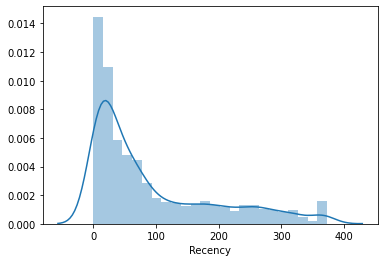

In [ ]:
import seaborn as sns
sns.distplot(RFM.Recency)

#right skewed output

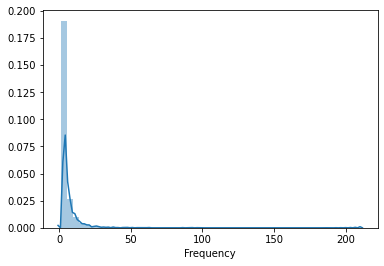

In [ ]:
sns.distplot(RFM.Frequency)

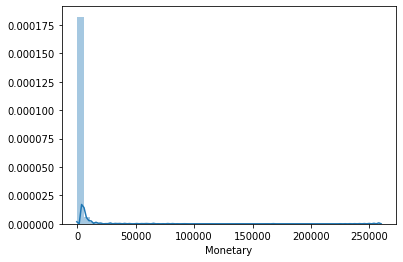

In [ ]:
sns.distplot(RFM.Monetary)

In [ ]:
RFM.describe()

,CustomerID,Recency,Frequency,Monetary,R,F,M,Scores
count,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000
mean,15561.471563,91.722265,4.246111,1863.910113,3.008416,2.628666,2.999490,8.636572
std,1576.823683,99.528532,7.205750,7481.922217,1.415721,1.504020,1.414574,3.719677
min,12346.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,3.000000
25%,14208.000000,17.000000,1.000000,300.040000,2.000000,1.000000,2.000000,5.000000
50%,15569.000000,50.000000,2.000000,651.820000,3.000000,2.000000,3.000000,8.000000
75%,16913.000000,142.000000,5.000000,1575.890000,4.000000,4.000000,4.000000,12.000000
max,18287.000000,373.000000,210.000000,259657.300000,5.000000,5.000000,5.000000,15.000000


In [ ]:
#Handle zero values to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
RFM['Recency'] = [handle_neg_n_zero(x) for x in RFM.Recency]
RFM['Monetary'] = [handle_neg_n_zero(x) for x in RFM.Monetary]

In [ ]:
#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = RFM[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)
Log_Tfd_Data

,Recency,Frequency,Monetary
2,0.000,5.347,10.426
3594,0.000,4.820,10.621
191,0.693,4.575,10.982
1268,0.000,4.533,9.406
1772,0.000,4.511,11.015
...,...,...,...
2582,3.178,0.000,5.847
954,5.617,0.000,4.808
956,4.585,0.000,5.897
2577,3.784,0.000,5.349


In [ ]:
Log_Tfd_Data.describe()

,Recency,Frequency,Monetary
count,3921.000000,3921.000000,3921.000000
mean,3.733576,0.945288,6.541543
std,1.475344,0.900419,1.251338
min,0.000000,0.000000,0.000000
25%,2.833000,0.000000,5.704000
50%,3.912000,0.693000,6.480000
75%,4.956000,1.609000,7.363000
max,5.922000,5.347000,12.467000


**Normalised RFM graphs**

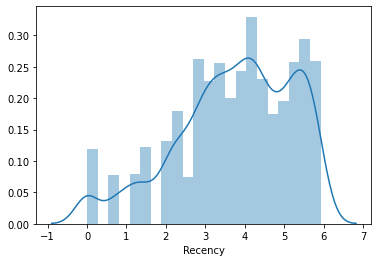

In [ ]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
ax = sns.distplot(Recency_Plot)
ax

**inference:** 
from right skewed data to normally distributed kde

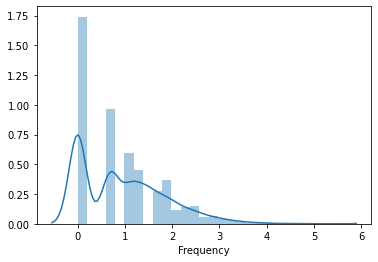

In [ ]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data['Frequency']
ax = sns.distplot(Frequency_Plot)
ax

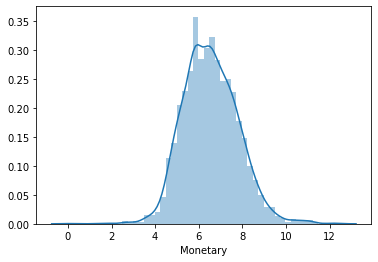

In [ ]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data['Monetary']
ax = sns.distplot(Monetary_Plot)

In [ ]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
sc = StandardScaler()
Scaled = sc.fit_transform(Log_Tfd_Data)

#Transform it back to dataframe
Scaled_data = pd.DataFrame(Scaled, index = RFM.index, columns = Log_Tfd_Data.columns)


In [ ]:
Scaled_data

,Recency,Frequency,Monetary
2,-2.530970,4.889138,3.104639
3594,-2.530970,4.303780,3.260492
191,-2.061189,4.031650,3.549020
1268,-2.530970,3.984999,2.289407
1772,-2.530970,3.960563,3.575395
...,...,...,...
2582,-0.376622,-1.049966,-0.555111
954,1.276763,-1.049966,-1.385528
956,0.577176,-1.049966,-0.515149
2577,0.034182,-1.049966,-0.953136


In [ ]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,20):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled)
    sum_of_sq_dist[k] = km.inertia_

In [ ]:
sum_of_sq_dist

{1: 11763.0,
 2: 5745.835913506604,
 3: 4326.366492119179,
 4: 3541.600970514837,
 5: 3032.728483493404,
 6: 2596.6090452096632,
 7: 2333.6896902944295,
 8: 2139.964428730275,
 9: 1959.0172184418493,
 10: 1807.5848938036775,
 11: 1688.8076678508635,
 12: 1575.3705856006354,
 13: 1493.787585299064,
 14: 1420.1735523411203,
 15: 1349.9888622822866,
 16: 1290.8796971663512,
 17: 1239.6345433261238,
 18: 1189.411882197603,
 19: 1148.806511211143}

In [ ]:
x = list(sum_of_sq_dist.keys())
x

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [ ]:
sum_of_sq_dist.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

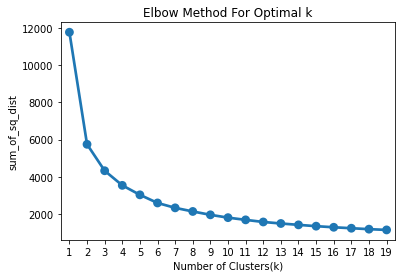

In [ ]:
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('sum_of_sq_dist')
plt.title('Elbow Method For Optimal k')
plt.show()

Inference : Elbow value is 3

In [ ]:
from sklearn.cluster import KMeans


km = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
km = km.fit(Scaled)


In [ ]:
#Find the clusters for the observation given in the dataset
RFM['Cluster'] = km.labels_
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,Scores,Cust_type,RFMGroup,Cluster
2,12748.0,1,210,33719.73,5,5,5,15,Platinum,555,1
3594,17841.0,1,124,40991.57,5,5,5,15,Platinum,555,1
191,13089.0,2,97,58825.83,5,5,5,15,Platinum,555,1
1268,14606.0,1,93,12156.65,5,5,5,15,Platinum,555,1
1772,15311.0,1,91,60767.90,5,5,5,15,Platinum,555,1


In [ ]:
from matplotlib import pyplot as plt

##Scatter Plot Frequency Vs Recency
colors = {1:"green", 2:"orange",0:"black"}
RFM['Color'] = RFM['Cluster'].map(colors)


In [ ]:
RFM.Cluster.value_counts()

0    1701
2    1523
1     697
Name: Cluster, dtype: int64

In [ ]:
RFM[RFM["Cluster"]==0]

,CustomerID,Recency,Frequency,Monetary,R,F,M,Scores,Cust_type,RFMGroup,Cluster,Color
3738,18037.0,154,6,70.02,2,4,1,7,Platinum,241,0,black
3649,17912.0,310,5,311.01,1,4,2,7,Platinum,142,0,black
2219,15920.0,154,4,167.50,2,4,1,7,Platinum,241,0,black
27,12845.0,267,4,354.09,1,4,2,7,Platinum,142,0,black
3581,17816.0,36,4,36.56,3,4,1,8,Platinum,341,0,black
...,...,...,...,...,...,...,...,...,...,...,...,...
2583,16424.0,191,1,133.56,1,1,1,3,Silver,111,0,black
2582,16423.0,24,1,346.12,4,1,2,7,Platinum,412,0,black
954,14165.0,275,1,122.54,1,1,1,3,Silver,111,0,black
956,14171.0,98,1,363.79,2,1,2,5,Silver,212,0,black


**Important key indicator**

I can see a column customer type in my RFM data frame that shows the customer type which is wrong in many rows so rather setting manually we can set it based on cluster results

In [ ]:
RFM["Cust_type"]=RFM["Cluster"].map({0:"Silver",1:"Platinum",2:"Gold"})

Text(0.5, 1.0, 'clusters')

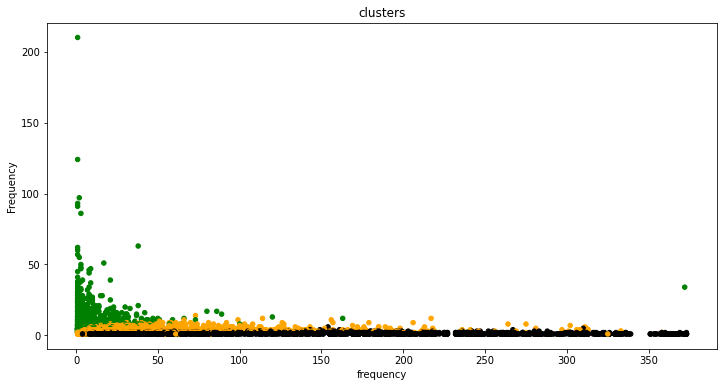

In [ ]:
ax = RFM.plot(    
    kind="scatter", 
    x="Recency", y="Frequency",
    figsize=(12,6),
    c = RFM['Color']
)
plt.xlabel("recency")
plt.xlabel("frequency")
plt.title("clusters")

Text(0.5, 1.0, 'clusters')

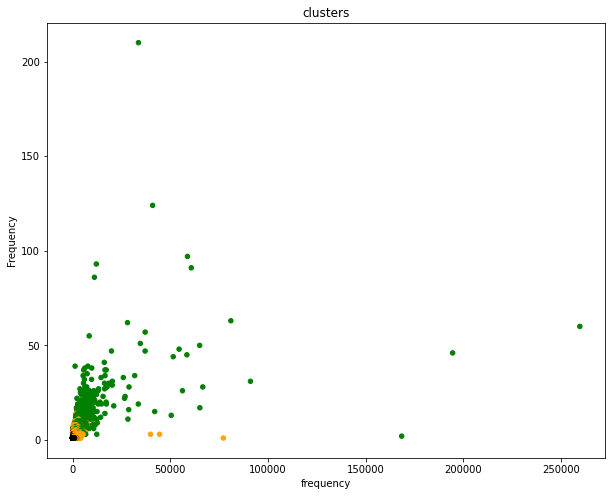

In [ ]:
ax = RFM.plot(    
    kind="scatter", 
    x="Monetary", y="Frequency",
    figsize=(10,8),
    c = RFM['Color']
)
plt.xlabel("monetary")
plt.xlabel("frequency")
plt.title("clusters")

# Inference:

In [ ]:
platinum_group = RFM[RFM["Cluster"]==1]
platinum_group.Scores.describe()

count    697.000000
mean      14.121951
std        0.942784
min       11.000000
25%       14.000000
50%       14.000000
75%       15.000000
max       15.000000
Name: Scores, dtype: float64

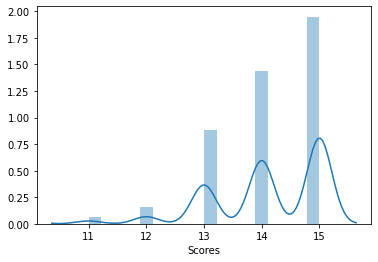

In [ ]:
sns.distplot(platinum_group.Scores)

In [ ]:
gold_group = RFM[RFM["Cluster"]==2]
gold_group.Scores.describe()

count    1523.000000
mean       10.098490
std         1.700898
min         7.000000
25%         9.000000
50%        10.000000
75%        11.000000
max        14.000000
Name: Scores, dtype: float64

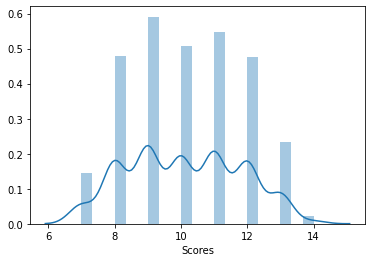

In [ ]:
sns.distplot(gold_group.Scores)

In [ ]:
silver_group = RFM[RFM["Cluster"]==0]
silver_group.Scores.describe()

count    1701.000000
mean        5.079953
std         1.428929
min         3.000000
25%         4.000000
50%         5.000000
75%         6.000000
max         8.000000
Name: Scores, dtype: float64

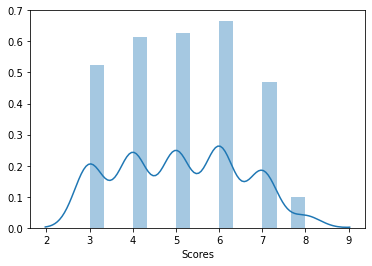

In [ ]:
sns.distplot(silver_group.Scores)